In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import re
import pytesseract

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from PIL import Image
from sklearn.metrics import accuracy_score


In [2]:
#loading dataset
df = pd.read_csv("kidney-stone-dataset.csv",index_col=[0])
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [3]:
#checking dimension
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 90
Total number of attributes/columns present in the dataset is: 7


In [4]:
df.rename(columns={"gravity":"Urine_Gravity","ph":"Urine_pH","osmo":"Osmolality","cond":"Conductivity","urea":"Urea",
                  "calc":"Calcium","target":"Target"},inplace=True)

Gravity: It refers to urine specific gravity, which measures the concentration of dissolved substances in urine.

pH: pH measures the acidity or alkalinity of urine.

Osmo (Osmolality): Osmolality measures the concentration of solutes (particles) in urine.

Cond (Conductivity): It measures the ability of urine to conduct electricity, which is influenced by the concentration of ions in the urine.

Urea: Urea is a waste product produced by the liver as a result of protein metabolism.

Calc (Calcium): Calcium is an important mineral that plays a role in bone health, muscle function, and nerve transmission.

Target: This is our target variable, which represents the presence or absence of kidney stones.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Urine_Gravity  90 non-null     float64
 1   Urine_pH       90 non-null     float64
 2   Osmolality     90 non-null     int64  
 3   Conductivity   90 non-null     float64
 4   Urea           90 non-null     int64  
 5   Calcium        90 non-null     float64
 6   Target         90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


In [6]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Urine_Gravity,0
Urine_pH,0
Osmolality,0
Conductivity,0
Urea,0
Calcium,0
Target,0


In [7]:
df.duplicated().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Urine_Gravity,90.0,1.017952,0.006780,1.005,1.012258,1.018000,1.023000,1.034
Urine_pH,90.0,6.036651,0.711801,4.760,5.536520,5.936247,6.490000,7.940
Osmolality,90.0,602.333333,238.459805,187.000,411.500000,572.000000,778.000000,1236.000
Conductivity,90.0,20.621687,7.654448,5.100,14.150000,21.177172,26.075000,38.000
Urea,90.0,258.200000,135.381127,10.000,148.250000,231.500000,366.250000,620.000
Calcium,90.0,4.017788,3.016273,0.170,1.412500,3.230000,5.965127,13.000
Target,90.0,0.500000,0.502801,0.000,0.000000,0.500000,1.000000,1.000


The average specific gravity of urine in the dataset is around 1.018, indicating a moderate concentration of dissolved substances.
The pH values vary from 4.76 to 7.94, showing a range of acidity levels.
The Osmolality values range from 187 to 1236, showing significant variability in solute concentration.
The Conductivity values range from 5.1 to 38, indicating differences in ion levels.
The average urea level in urine is approximately 258.2, with a relatively high standard deviation, suggesting variability.
The Calcium values range from 0.17 to 13, showing variability in calcium excretion.

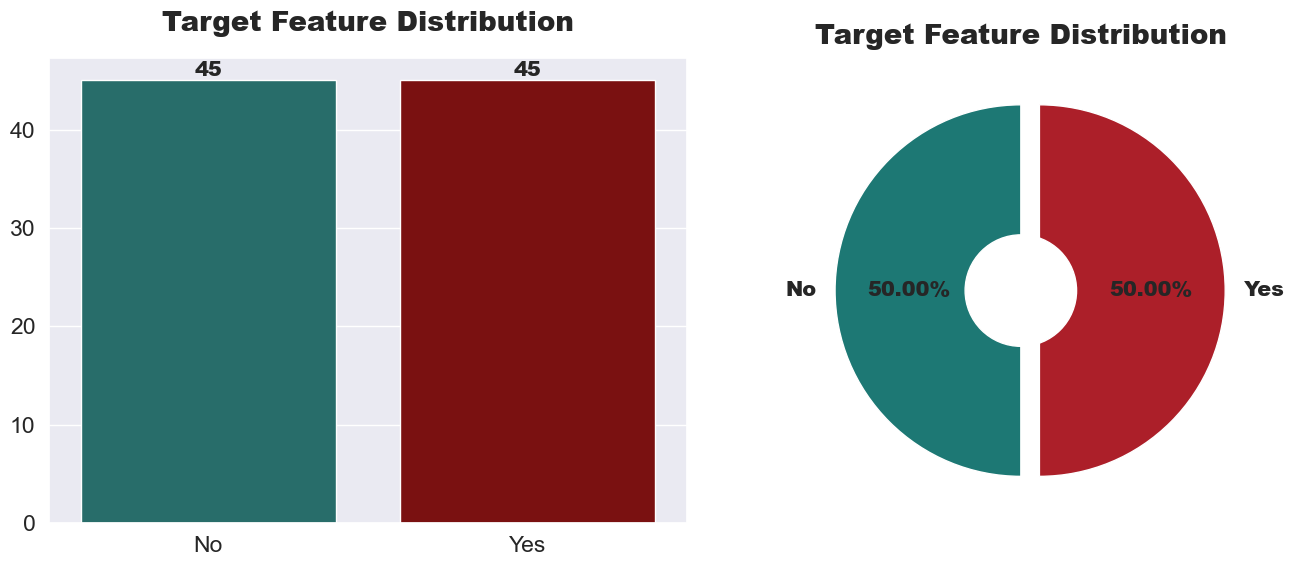

In [9]:
#Exploratory Data Analysis
#Visualizing the Target Feature Distribution.

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.barplot(y=df["Target"].value_counts().values,x=["No","Yes"],palette=["#1d7874","#8B0000"])
plt.title("Target Feature Distribution",fontweight="black",size=20,pad=20)
ax.bar_label(ax.containers[0],fontweight="black",size=15)



plt.subplot(1,2,2)
plt.pie(df["Target"].value_counts().values, labels=["No","Yes"], autopct="%.2f%%",
        textprops={"fontweight":"black","size":15}, colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Target Feature Distribution",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

The class is highly balanced, which indicates that we have equal records of patinets who have stones in their kidney and vice-versa.

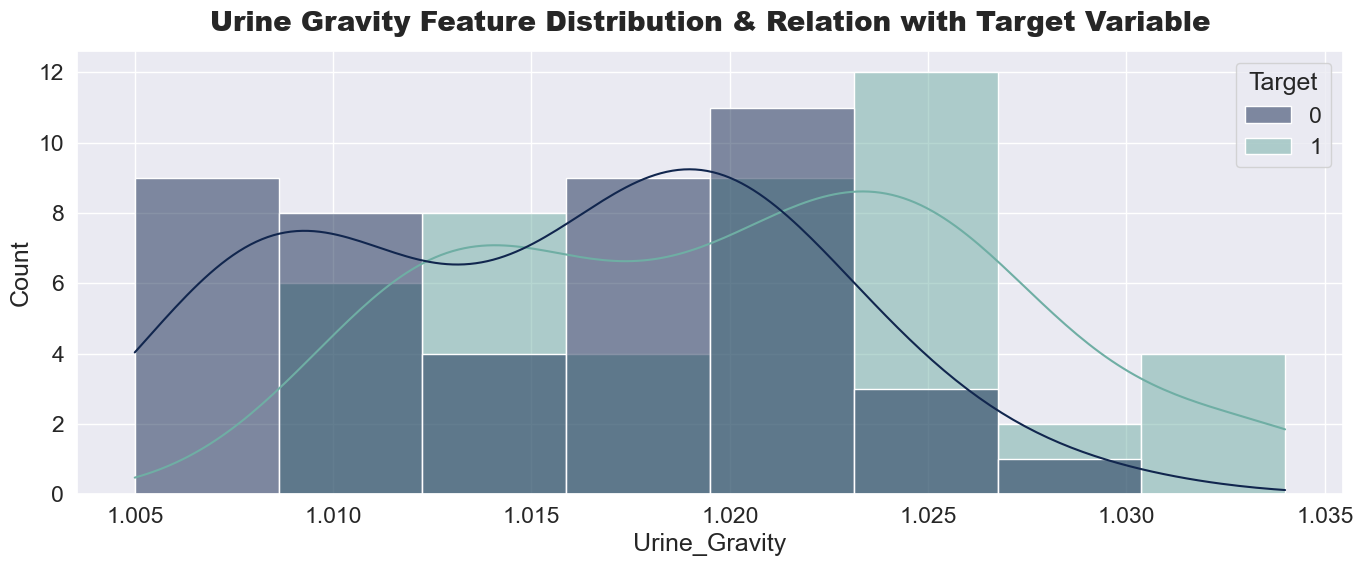

In [10]:
# Visualizing Urnine_Gravity Feature Distribution & Relation.
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urine_Gravity"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urine Gravity Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

-> Most of patient having stone in their kidney are having high Urine gravity and vice-versa.
-> So we can make an infernece that with increase in Urine gravity value their is more likey to have stone in their kidney.
-> Hence, this feature is essential for model-building.

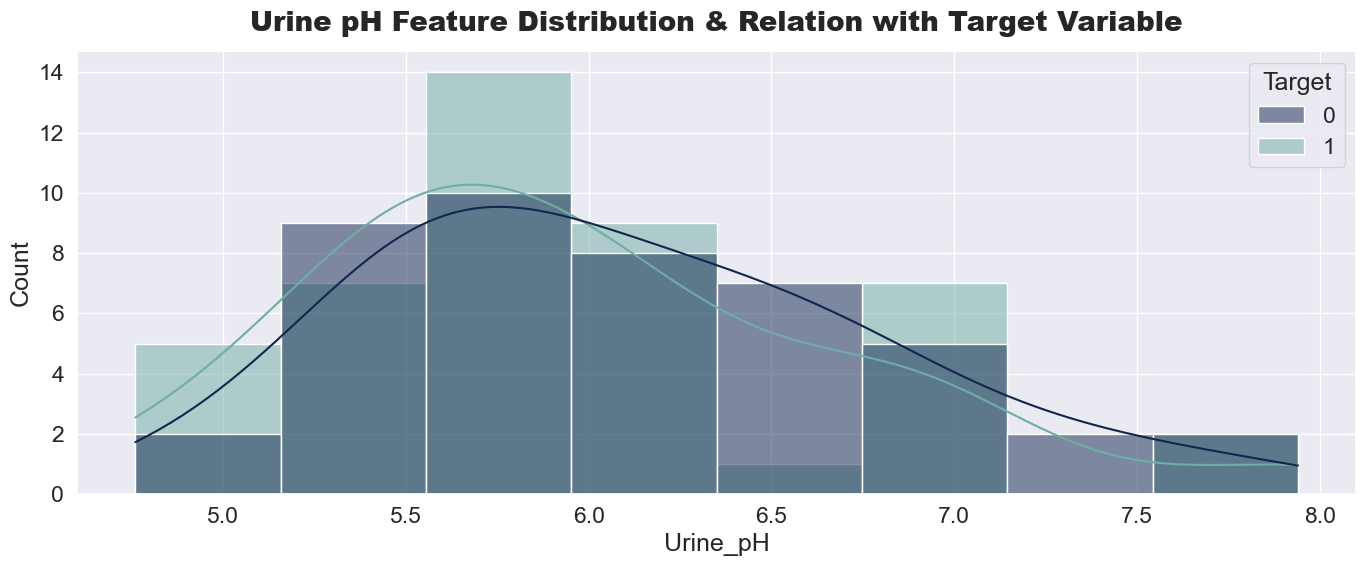

In [11]:
# Visualizing Urine_pH Feature Distribution & Relation.
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urine_pH"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urine pH Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

-> Most of patient having stone in their kidney are likely to have pH value very low or equal to average pH value.
-> Some of patient having high pH values are also suffereing from this disease.
-> So we can't conclude any direct relation between pH and Target Variabels.

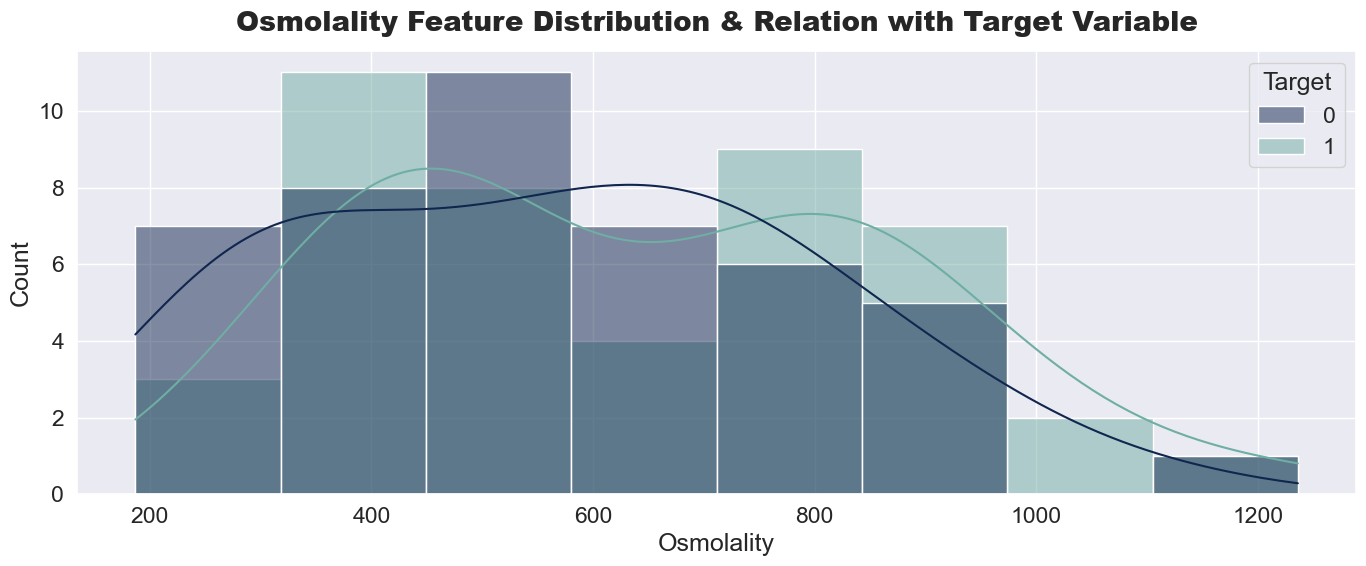

In [12]:
#Visualizing Osmolality Feature Distribution & Relation.
plt.figure(figsize=(14,6))
sns.histplot(x=df["Osmolality"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Osmolality Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

-> Most of patient having stone in their kidney are likely to have Osmolality value very low or very high.
-> Patients having average osmolality value are having low chance of having stone in their kidney.
-> Hence, this feature is essential for model-building.

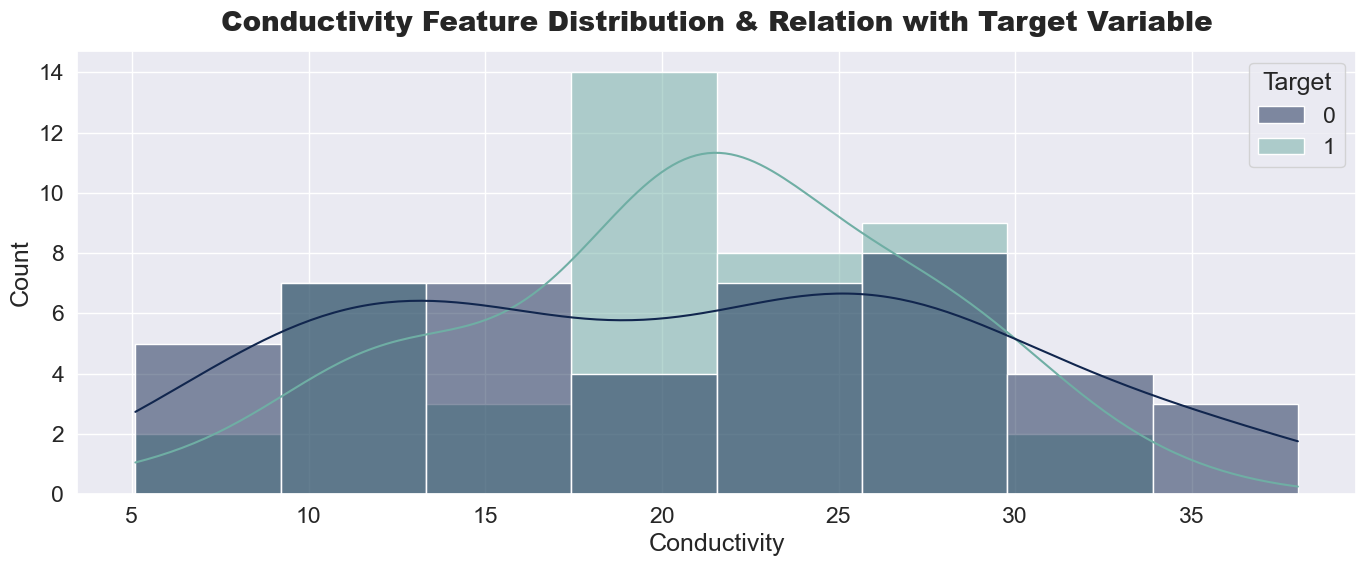

In [13]:
#Visualizing Conductivity Feature Distribution & Relation.
plt.figure(figsize=(14,6))
sns.histplot(x=df["Conductivity"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Conductivity Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

-> Most of the patient having stone in their kidney are having an avergae conductivity (ion level) value.
-> But some patient having low ion level are also suffering from this disease.
-> So we can't conclude that there is any kind of direct relation between conductivity and target features.

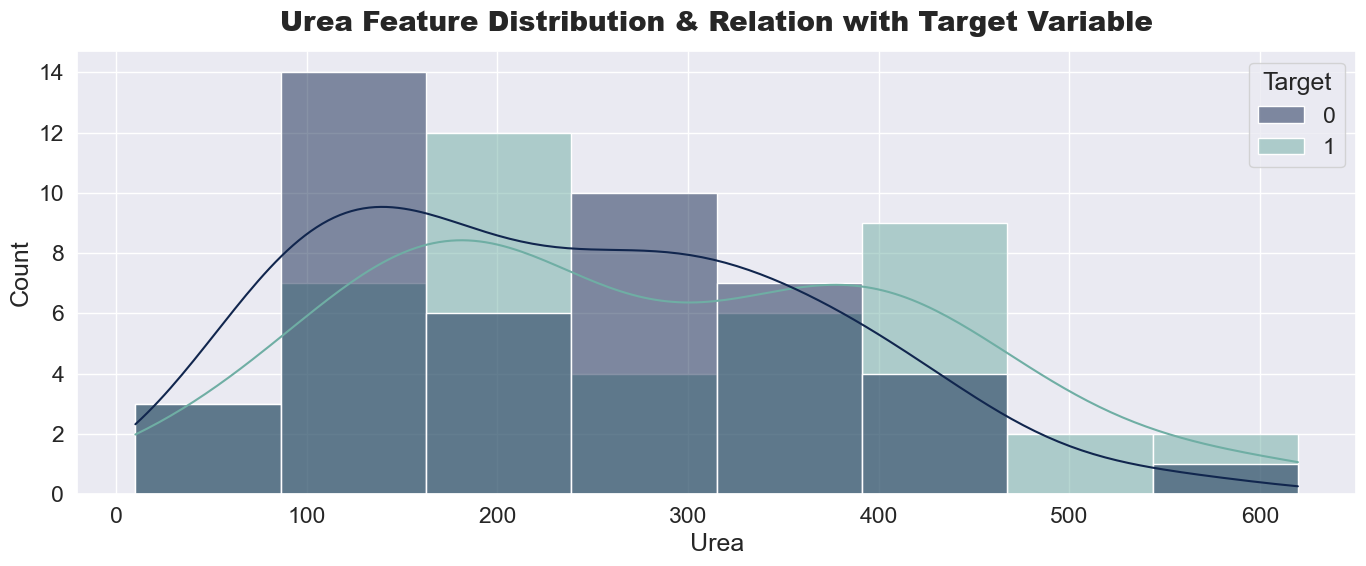

In [14]:
# Visualizing Urea Feature Distribution & Relation.
plt.figure(figsize=(14,6))
sns.histplot(x=df["Urea"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Urea Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

-> Most of the patient having stone in their kidney are having high urea values.
-> But some patient having average or low Urea values are also suffering from this disease.
-> So we can't conclude that there is any kind of direct relation between Urea and target features.

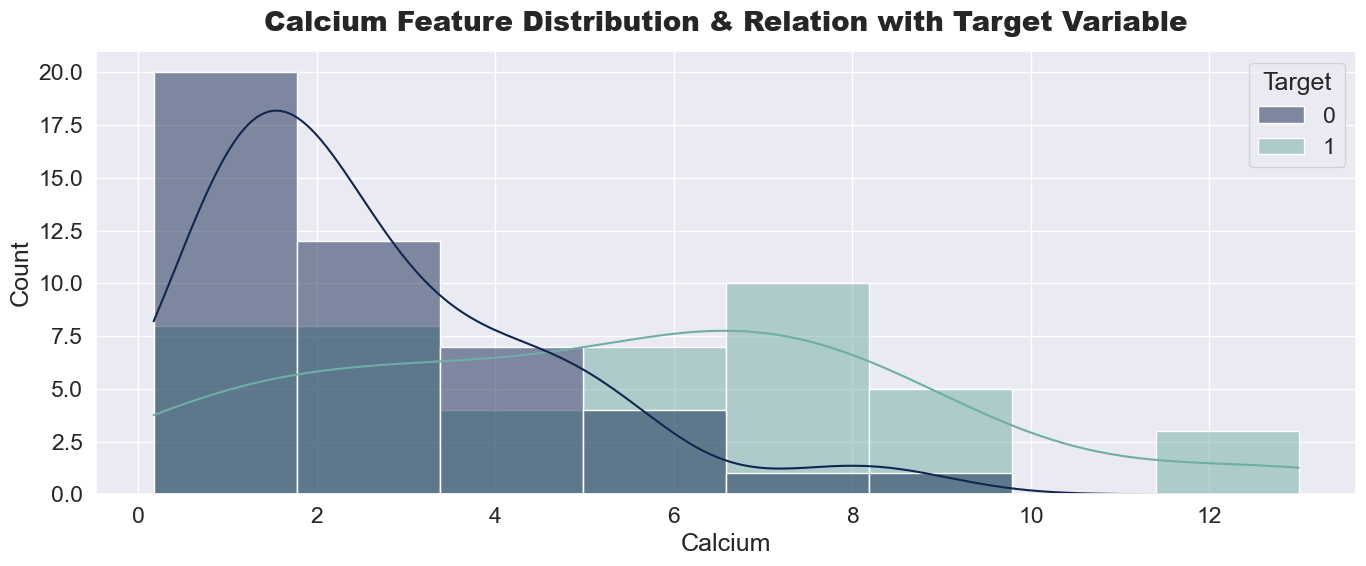

In [15]:
#Visualizing Calcium Feature Distribution & Relation.
plt.figure(figsize=(14,6))
sns.histplot(x=df["Calcium"],hue=df["Target"],kde=True,palette=["#11264e","#6faea4"])
plt.title("Calcium Feature Distribution & Relation with Target Variable",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

Most of the patient having stone in their kidney are having high calcium values.
so we can make an infernece that with increase in calcium level there is more chance of patinet having stone in kidney.
Hence, this feature is essential for model-building.

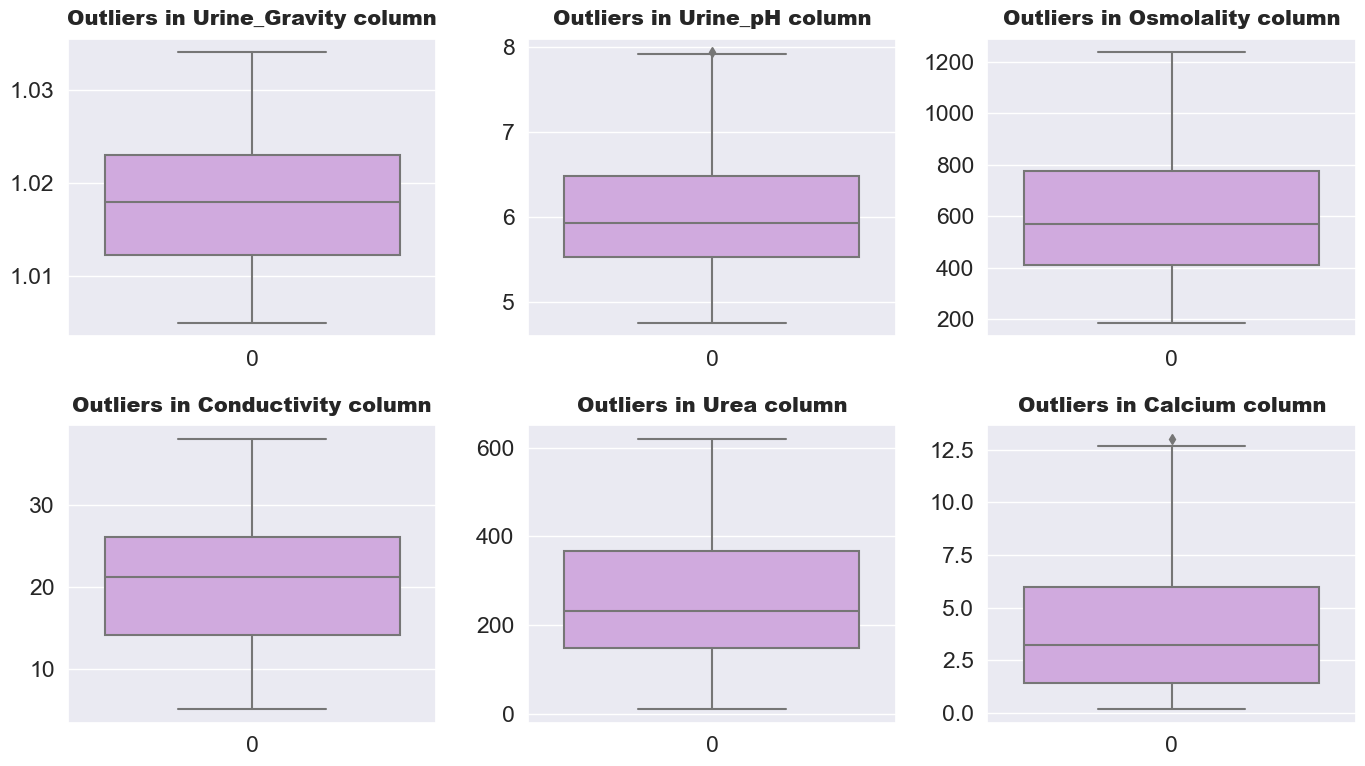

In [16]:
# Checking Outliers in Independent variables
ind_cols = df.columns.tolist()
ind_cols.remove("Target")

plt.figure(figsize=(14,8))
for index,column in enumerate(ind_cols):
    plt.subplot(2,3,index+1)
    sns.boxplot(df[column],palette=["#D4A1E7"])
    plt.title(f"Outliers in {column} column",fontweight="black",size=15,pad=10)
    plt.tight_layout()

Urine_pH & Calcium features are having have some outlier values.
All the features are having stable spread becuase they don't have any extemly high or extremely low values

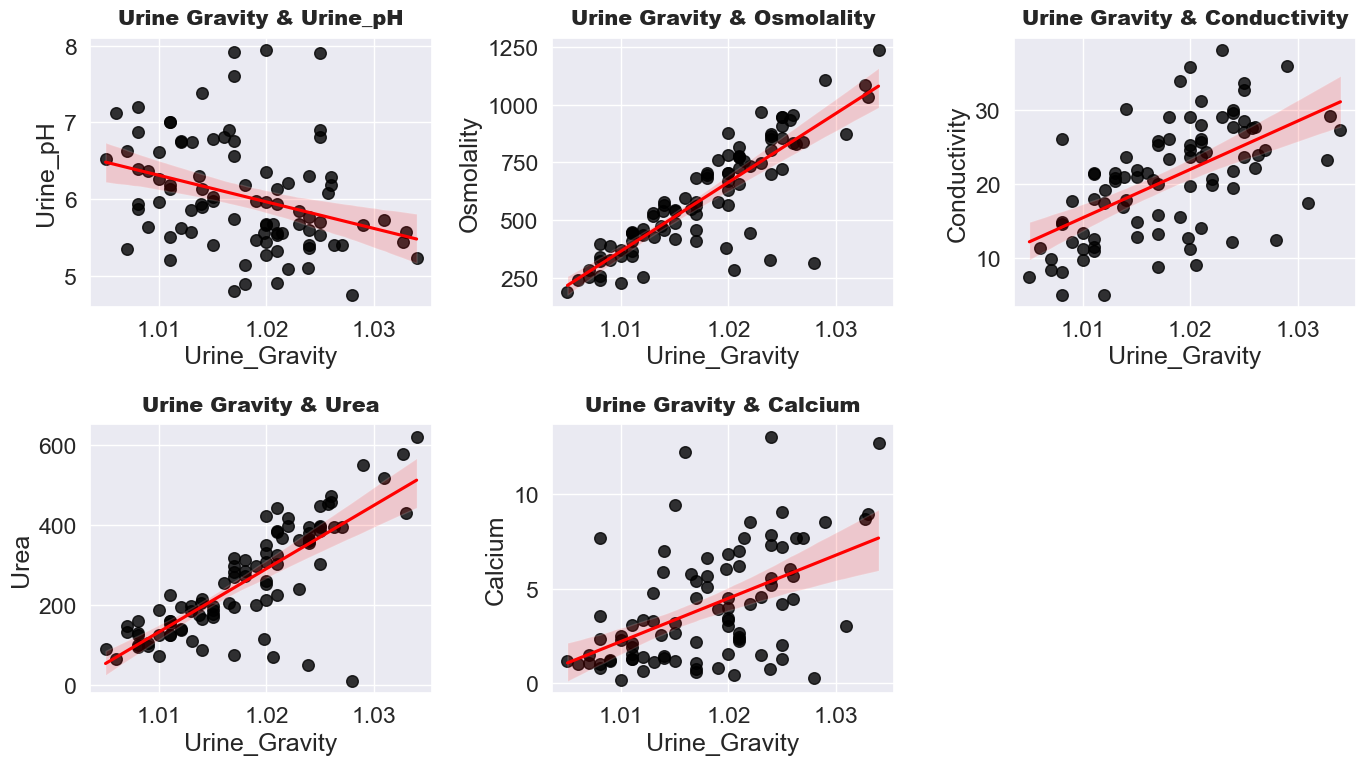

In [17]:
# Finidng Realtion between "Urine_Gravity w.r.t Other Features.
cols = df.columns.tolist()
cols.remove("Urine_Gravity")
cols.remove("Target")


plt.figure(figsize=(14,8))
for index,col in enumerate(cols):
    plt.subplot(2,3,index+1)
    sns.regplot(x="Urine_Gravity",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Urine Gravity & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

Urea & Osmolality feature are having proper linear relation with Urine Gravity Feature.
With increase in Urine Gravity the Urine PH decreases so there's also a linear relation among them.
Features like Conductivity & Calcium are showing linear relation among the features.
So we can conclude that Urine Gravity is an important feature which will help model in building patterns for better prediction.

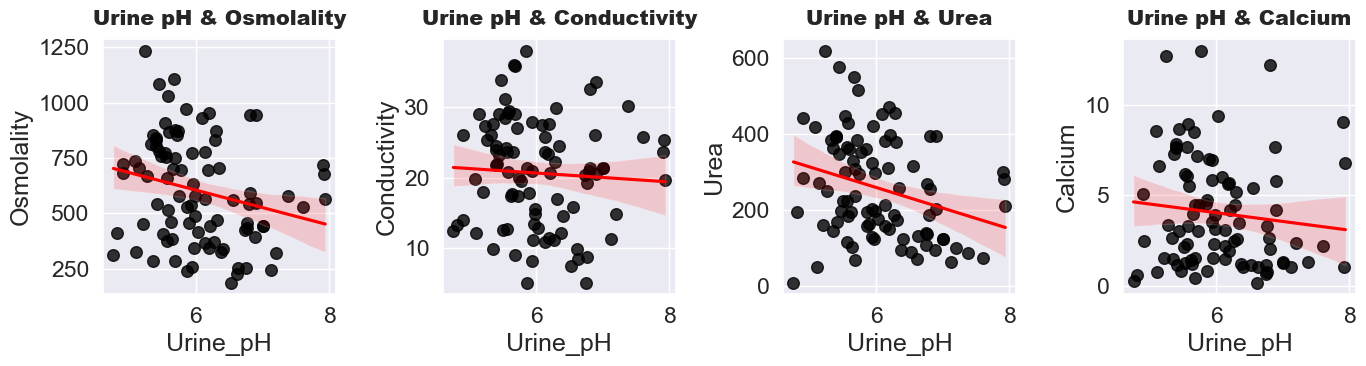

In [18]:
# Finidng Realtion between Urine_PH w.r.t Other Features.
cols=["Osmolality","Conductivity","Urea","Calcium"]

plt.figure(figsize=(14,4))
for index,col in enumerate(cols):
    plt.subplot(1,4,index+1)
    sns.regplot(x="Urine_pH",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Urine pH & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

Urine pH feature is having litte relation with feature Osmolality & Urea.
Urine pH is having no relation with Conductivity or Calcium features.**
So pH feature doesn't seem that much relevant for model-building.
Hence, we will perform Feature Engineering to make it more relvant for model building.

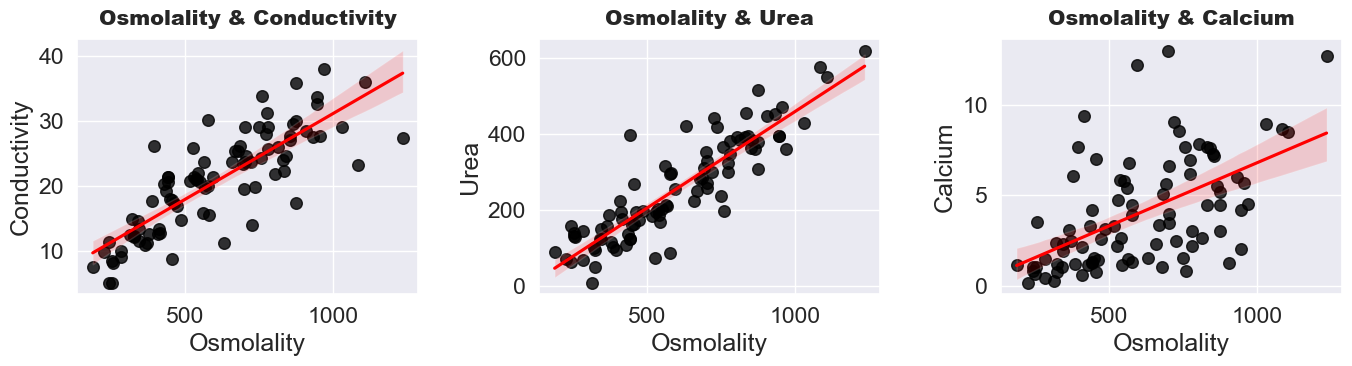

In [19]:
#Finidng Realtion between Osmolality w.r.t Other Features.
cols = ["Conductivity","Urea","Calcium"]

plt.figure(figsize=(14,4))
for index,col in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x="Osmolality",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Osmolality & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

Osmolality feature is having strong linear relation with Conductivity, Urea, Calcium features.
So we can conclude that Osmolality is an important feature which will help model in building patterns for better prediction.

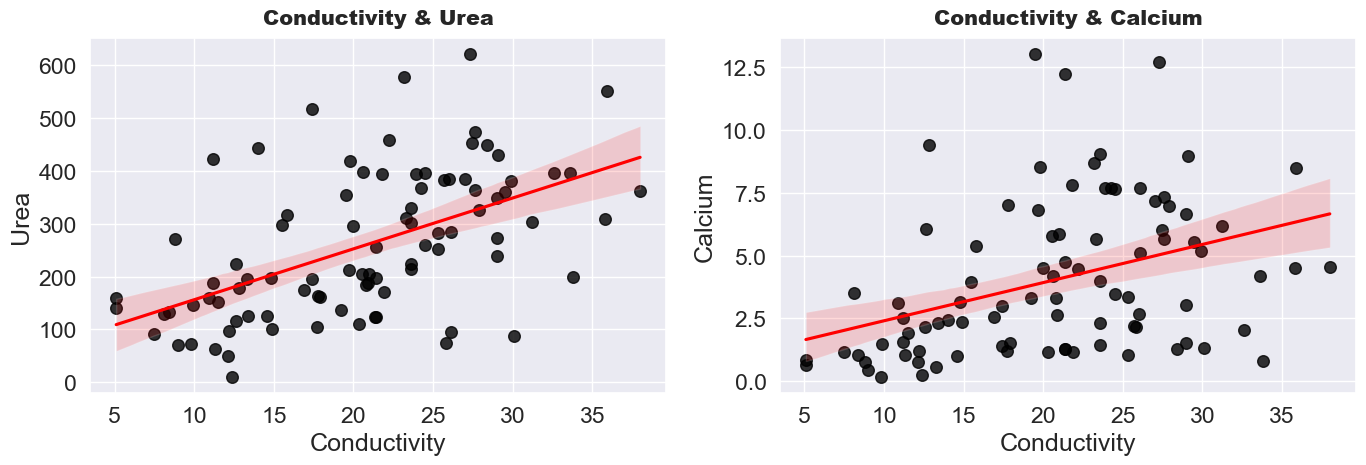

In [20]:
# Finidng Realtion between Conductivity w.r.t Other Features.
cols = ["Urea","Calcium"]

plt.figure(figsize=(14,5))
for index,col in enumerate(cols):
    plt.subplot(1,2,index+1)
    sns.regplot(x="Conductivity",y=col,data=df,scatter_kws={'s': 70,"color":"black"}, line_kws={'color': 'red'})
    plt.title(f"Conductivity & {col}",fontweight="black",pad=10,size=15)
    plt.tight_layout()

Conductivity feature is having little linear relation with Urea, Calcium features.
So we can conclude that conductivity is an important feature which will help model in building patterns for better prediction.

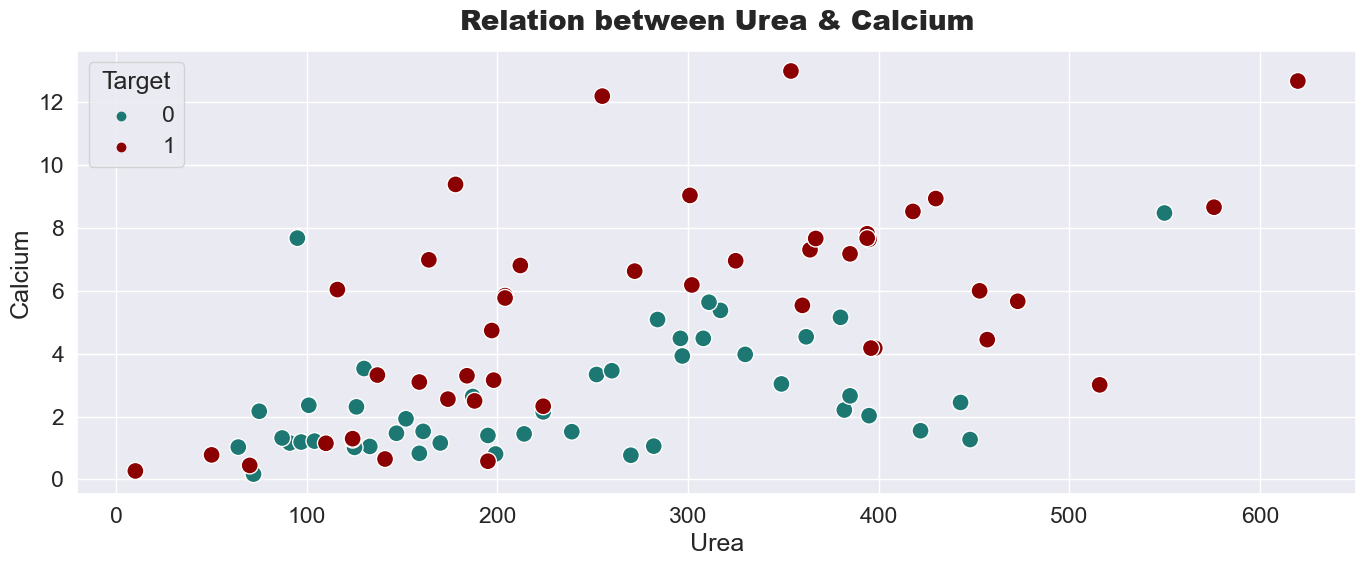

In [21]:
#Finidng Realtion between Urea & Calcium Features.
plt.figure(figsize=(14,6))
sns.scatterplot(x="Urea",y="Calcium",data=df,hue="Target", markers=["o", "s"], s=150,palette=["#1d7874","#8B0000"])
plt.title("Relation between Urea & Calcium",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

We can clearly observe that with increase in Urea, Calcium also increases.
Patients having high calcium values are more likey to have stone in their kidney.
So we can conclude that Calcium & Urea is an important feature which will help model in building patterns for better prediction.

In [22]:
# Feature Engineering
#From above eda we concluded that Urine_pH feature is not that relevant for model-building.
#So we can create a new feature by creating bins to show Urine_pH scale, Acidic, Neutral, Alkaline.

df[["Urine_pH"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Urine_pH,90.0,6.036651,0.711801,4.76,5.53652,5.936247,6.49,7.94


In [23]:
bin_edges = [4.70, 5.53652, 6.49, 7.94]
bin_labels = ['Acidic', 'Neutral', 'Alkaline']


df['Urine_pH_bin'] = pd.cut(df['Urine_pH'], bins=bin_edges, labels=bin_labels)

In [24]:
df["Urine_pH_bin"].sample(5).to_frame()

,Urine_pH_bin
26,Alkaline
4,Alkaline
67,Neutral
35,Neutral
71,Acidic


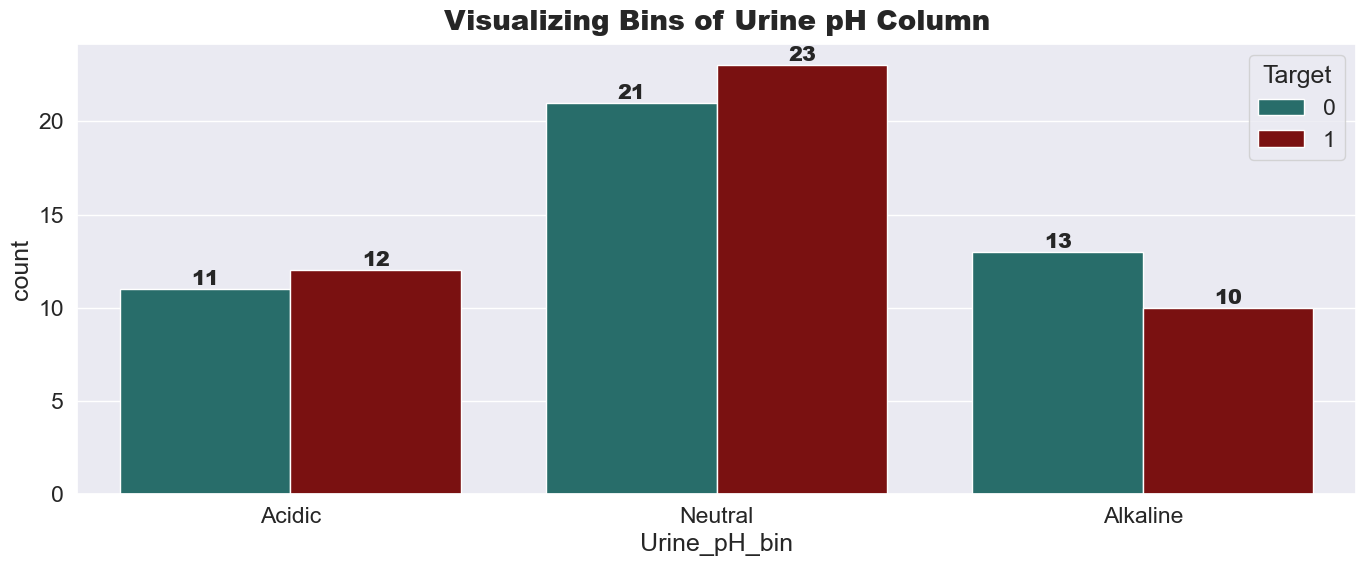

In [25]:
# Let's visualise our new feature
plt.figure(figsize=(14,6))
ax=sns.countplot(x=df["Urine_pH_bin"],hue=df["Target"],palette=["#1d7874","#8B0000"])
ax.bar_label(ax.containers[0],fontweight="black",size=15)
ax.bar_label(ax.containers[1],fontweight="black",size=15)
plt.title("Visualizing Bins of Urine pH Column",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

Both the categories of target variable are having approxiamately equal patients
So from this new feature we can conclude that Patinet having stone in their kidney may or may not depend on Urine_pH.

In [26]:
# Statistical Analysis - Feature Importance
# Null Hyothesis: There is no relation among the feature.
# ALternate Hypothesis: There is relation among the feature.

In [27]:
#Performing ANOVA Test to Analyze the Numerical Features Importance in Kidney Stone.
num_cols = df.select_dtypes(np.number).columns.tolist()

f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(df["Target"],df[column])
    f_scores[column] = f_score
    p_values[column] = p_value

In [28]:
# Comparing F_Score and P_value of ANOVA Test.
test_df = pd.DataFrame({"Features":f_scores.keys(),"F_Score":f_scores.values()})
test_df["P_value"] = p_values.values()
test_df

,Features,F_Score,P_value
0,Urine_Gravity,95.488215,2.512290e-18
1,Urine_pH,3632.673094,2.315363e-120
2,Osmolality,573.274581,1.497575e-57
3,Conductivity,619.260888,7.502950e-60
4,Urea,326.098731,4.294252e-42
5,Calcium,119.106962,1.476426e-21
6,Target,0.000000,1.000000e+00


Based on the P-Values following conclusion can be made.

Urine_Gravity: p-value < 0.05 (Reject null hypothesis)

Urine_pH: p-value < 0.05 (Reject null hypothesis)

Osmolality: p-value < 0.05 (Reject null hypothesis)

Conductivity: p-value < 0.05 (Reject null hypothesis)

Urea: p-value < 0.05 (Reject null hypothesis)

Calcium: p-value < 0.05 (Reject null hypothesis)

Since we have to reject null hypothesis for each colum.

Hence, we can conclude that all the features have relation with the target variable.

In [29]:
#Performing Chi-Square Test to identify the relation bwteen Target & Urine_pH_bin feature.

In [30]:
contingency_table = pd.crosstab(df["Target"], df['Urine_pH_bin'])

chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print("P-Value is:",p_value)

P-Value is: 0.7688604081605568


Since the p-value is > 0.05 so we were failed to reject the null hypothesis.
Hencce we can conclude that there is no relation between those two features.
So the new feature we created doesn't seem to be relevant with target feature.

In [31]:
# Data Preprocessing
# Dropping Features which are not Relevant.

df.drop(columns=["Urine_pH_bin"],inplace=True)

In [32]:
# Segregating Features & Labels for Model Training.
X = df.drop(columns=["Target"])
y = df["Target"]

In [33]:
# Splitting Data For Model Training & Testing.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (72, 6)
Shape of x_test is:  (18, 6)
Shape of y_train is: (72,)
Shape of y_test is:  (18,)


Data is equally splitted for Model Training & Testing.
So we can build a Predictive Model to find the key factors that are significantly influencing kidney stone patients

In [35]:
# Decision Tree
# Performing Grid-Search with cross-validation to find the best Parameters for the Model.
dtree = DecisionTreeClassifier()

In [36]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "random_state":[0,42]}

In [37]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [38]:
#Fetching the Best Parameters for DecisionTree Model.
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'random'}

In [39]:
#Creating DecisionTree Model Using Best Parameters.
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0, splitter='random')

In [40]:
# Computing Model Accuracy.
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 97.22 %
Accuracy Score of Model on Testing Data  is => 83.33 %


In [41]:
# Model Evaluation using Different Metric Values
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred))

F1 Score of the Model is => 0.7999999999999999
Recall Score of the Model is => 0.8571428571428571
Precision Score of the Model is => 0.75


Training accuracy is 97% where as testing accuracy is 83%. So we can say the model is overfit even after hyper-parameter tunning. (best parameters)

We can observe that recall, precision, and F1 score are near to 0.8, it means that our** model is achievinga balanced fit between** correctly identifying positive samples (recall) and minimizing false positives (precision).

In [42]:
# Finding Importance of Features in DecisionTreeClassifier
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

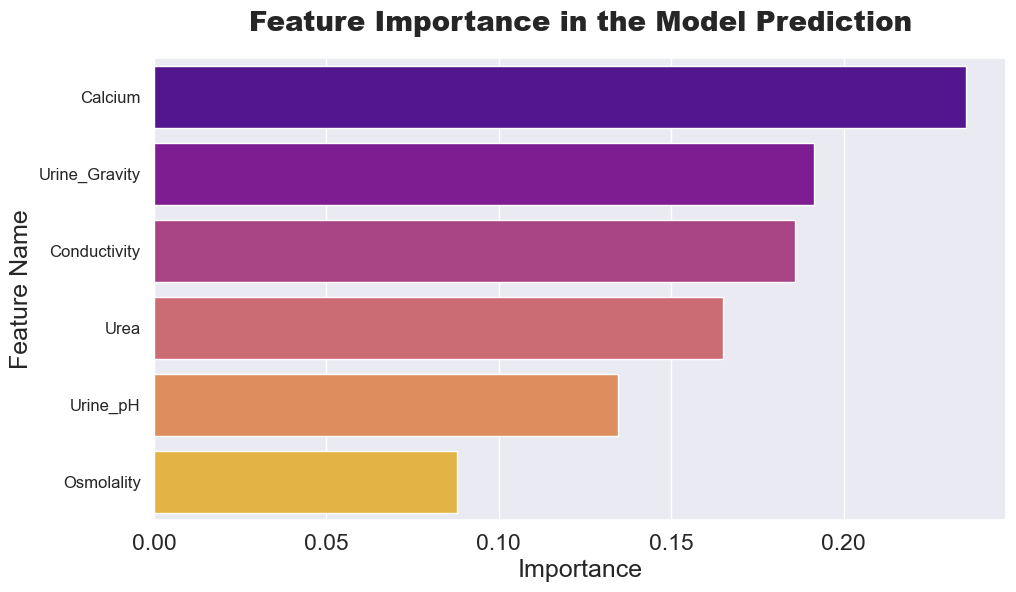

In [43]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(11,6))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

The key factors that significantly influence the Kidney Stone patient are: are:-

Clacium, Urine_Gravity, and Conductivity.
The minimal impact of features on the kidney stone patient are: are:-

Osmolality, and Urine_pH

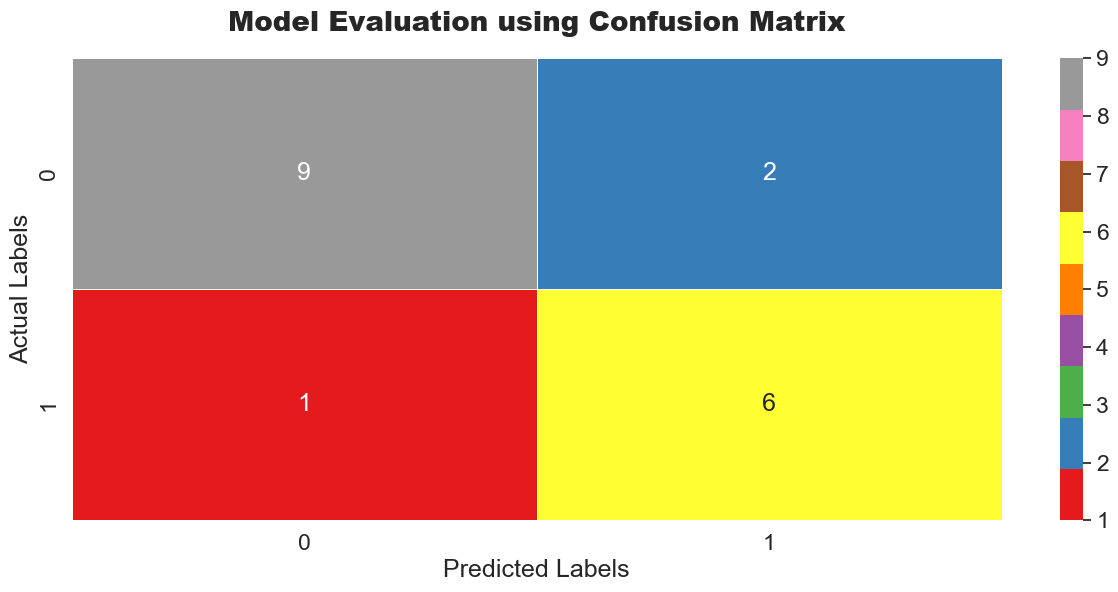

In [44]:
#evaluating model Perrformance
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Strong True Positive Rate: The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

Strong False Negative Rate: The model achieved a high number of False Negative predictions, indicating its ability to correctly identify negative cases. This suggests that the model is effective in accurately classifying the desired outcome.

In [45]:
# Random Forest
#  Performing Grid-Search with cross-validation to find the best Parameters for the Model.
rfc = RandomForestClassifier()

In [46]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [47]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

In [48]:
# Fetching the Best Parameters for RandomForest Model.
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 90}

In [49]:
# Creating RandomForest Model Using Best Parameters.
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=90)

In [50]:
# Computing Model Accuracy
y_train_pred = rfc.predict(x_train)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 97.22 %
Accuracy Score of Model on Testing Data  is => 77.78 %


In [51]:
# Model Evaluation using Different Metric Values
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred))

F1 Score of the Model is => 0.6666666666666666
Recall Score of the Model is => 0.5714285714285714
Precision Score of the Model is => 0.8


Model accuracy on training data is 95% and on the testing data is 78%. So the model is having a kind of best fit.

We can observe that recall, precision, and F1 score are all the same, it means that our model is achieving perfect balance between correctly identifying positive samples (recall) and minimizing false positives (precision).

In [52]:
# Finding Importance of Features in RandomForest Model.
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

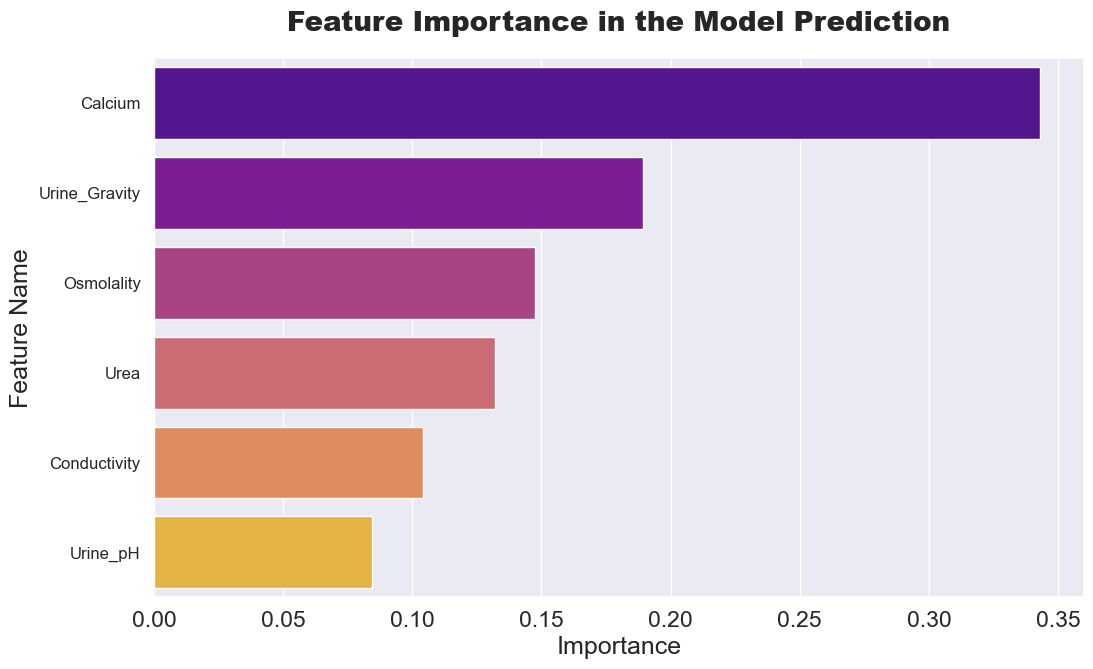

In [53]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

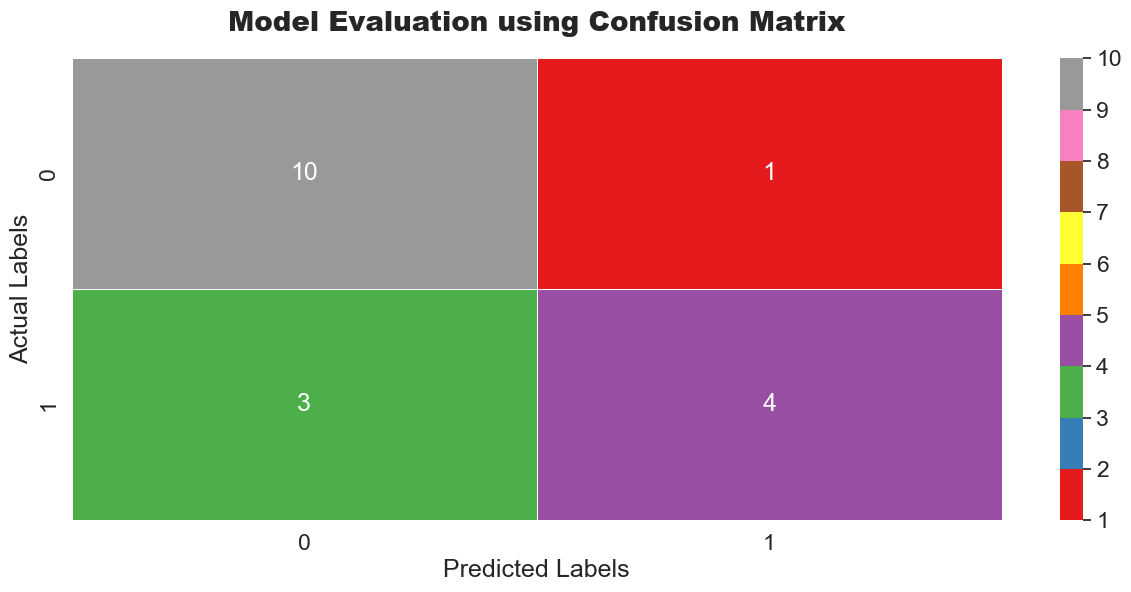

In [54]:
#  Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Strong True Positive Rate: The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

Strong False Negative Rate: The model achieved a high number of False Negative predictions, indicating its ability to correctly identify negative cases. This suggests that the model is effective in accurately classifying the desired outcome.

In [55]:
# Prompt user for values
try:
    user_gravity = float(input("Please enter your urine gravity value: "))
    user_ph = float(input("Please enter your urine pH value: "))
    user_osmo = float(input("Please enter your osmolality (osmo) value: "))
    user_cond = float(input("Please enter your conductivity (cond) value: "))
    user_urea = float(input("Please enter your urea value: "))
    user_calc = float(input("Please enter your calcium (calc) value: "))
except ValueError:
    print("Invalid input. Please enter valid numbers.")

# Create feature vector for prediction
feature_vector = [[user_gravity, user_ph, user_osmo, user_cond, user_urea, user_calc]]

# Make prediction using the trained Decision Tree model
prediction = dtree.predict(feature_vector)

# Output the prediction
if prediction[0] == 1:
    print("Based on the provided values, there is a likelihood of kidney stones.")
else:
    print("Based on the provided values, there is a low likelihood of kidney stones.")

Please enter your urine gravity value: 1
Please enter your urine pH value: 2
Please enter your osmolality (osmo) value: 3
Please enter your conductivity (cond) value: 4
Please enter your urea value: 5
Please enter your calcium (calc) value: 6
Based on the provided values, there is a likelihood of kidney stones.


**Conclusion**

The model demonstrates strong performance with an accuracy of 95% on training data and 88% on testing data, indicating a solid fit to the dataset.

Remarkably, the model achieves consistent recall, precision, and F1 score values, suggesting a perfect balance between effectively identifying positive cases and minimizing false positives.

The Important factors significantly impacting kidney stone patients are identified as Calcium, Urine_Gravity, and Urea, underscoring their vital roles in predicting the presence of kidney stones.

Conversely, Urine pH and Conductivity and Osmolality are found to have minimal impact on distinguishing kidney stone patients, suggesting these features may be less influential in the predictive process.

Using this research can potentially aid in early detection of KD in patients........

In [56]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
log_reg = LogisticRegression()


dtree.fit(x_train, y_train)
rfc.fit(x_train, y_train)
log_reg.fit(x_train, y_train)


dtree_pred = dtree.predict(x_test)
rfc_pred = rfc.predict(x_test)
log_reg_pred = log_reg.predict(x_test)


voting_ensemble = VotingClassifier(estimators=[('dtree', dtree), ('rfc', rfc), ('log_reg', log_reg)], voting='hard')


voting_ensemble.fit(x_train, y_train)


ensemble_pred = voting_ensemble.predict(x_test)


dtree_accuracy = accuracy_score(y_test, dtree_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)


ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

print("Decision Tree Accuracy:", dtree_accuracy)
print("Random Forest Accuracy:", rfc_accuracy)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Ensemble Accuracy:", ensemble_accuracy)


Decision Tree Accuracy: 0.7777777777777778
Random Forest Accuracy: 0.7777777777777778
Logistic Regression Accuracy: 0.6666666666666666
Ensemble Accuracy: 0.7777777777777778


In [57]:
# IRFDTF MODEL
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


base_models = [
    ('dtree', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier()),
    ('log_reg', LogisticRegression())
]


ensemble_model = VotingClassifier(estimators=base_models, voting='soft')


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ensemble', ensemble_model)   # Combine models
])


param_grid = {
    'ensemble__dtree__max_depth': [3, 5, 7],
    'ensemble__rfc__n_estimators': [50, 100, 150],
    'ensemble__log_reg__C': [0.1, 1, 10]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)


y_pred = grid_search.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7222222222222222


In [58]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [59]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [60]:
import pytesseract
from PIL import Image


image_path = 'image.jpg'


img = Image.open(image_path)


text = pytesseract.image_to_string(img)


print(text)

NAME : Mrs. Shruti Rathod SEX : Female
REF BY : DrPrasad Shinde DATE _ : 11-03-2024

URINE ANALYSIS REPORT

TESTS RESULTS UNIT REFERENCE RANGE
Colour : Pale Yellow

Quantity : 20ml

Appearance : Clear

Deposits : Absent

Gravity : 1.008

Reaction(PH) | 72

Calcium. : 2.36

Conductivity : 14.9

Osmolality : 321

Urea : 101 5,9-8,6

Chemical Examination

Proteins : Trace

Sugar : Absent

Ketone Bodies : absent

Bile Salts : Absent

Bile Pigments : Absent

Mice ic E 5 adi

RBC 21-2 /hpf
PUS(WBC)Cells 12-3 /hpf
Epithelial Cells 13-4 /hpf
Casts : Absent

Crystals : Absent



In [61]:
import re
import pytesseract
from PIL import Image


image_path = 'image.jpg'


img = Image.open(image_path)

text = pytesseract.image_to_string(img)

extracted_values = {}


keywords = {
    'gravity': r'Gravity\s*:\s*(\d+\.*\d*)',
    'urea': r'Urea\s*:\s*(\d+\.*\d*)',
    'osmolality': r'Osmolality\s*:\s*(\d+\.*\d*)',
    'conductivity': r'Conductivity\s*:\s*(\d+\.*\d*)',
    'pH': r'(?:pH|reaction\s*\(\s*PH\s*\))\s*[:=]\s*(\d+\.*\d*)',
    'calcium': r'Calcium\s*[:=]\s*(\d+\.*\d*)'
}


for keyword, pattern in keywords.items():
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        extracted_values[keyword] = float(match.group(1))


for keyword, value in extracted_values.items():
    print(f"{keyword}: {value}")


gravity: 1.008
urea: 101.0
osmolality: 321.0
conductivity: 14.9


In [62]:


# IRFDTF MODEL
base_models = [
    ('dtree', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier()),
    ('log_reg', LogisticRegression())
]

ensemble_model = VotingClassifier(estimators=base_models, voting='soft')

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ensemble', ensemble_model)   # Combine models
])

param_grid = {
    'ensemble__dtree__max_depth': [3, 5, 7],
    'ensemble__rfc__n_estimators': [50, 100, 150],
    'ensemble__log_reg__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)


def predict_kidney_stones(image_path):
    
    img = Image.open(image_path)

    
    text = pytesseract.image_to_string(img)

    extracted_values = {}

    
    keywords = {
        'gravity': r'Gravity\s*:\s*(\d+\.*\d*)',
        'urea': r'Urea\s*:\s*(\d+\.*\d*)',
        'osmolality': r'Osmolality\s*:\s*(\d+\.*\d*)',
        'conductivity': r'Conductivity\s*:\s*(\d+\.*\d*)',
        'pH': r'(?:REACTION\s*\(\s*PH\s*\))\s*[:=]\s*(\d+\.*\d*)',
        'calcium': r'Calcium\s*[:=]\s*(\d+\.*\d*)'
    }

    
    for keyword, pattern in keywords.items():
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            extracted_values[keyword] = float(match.group(1))
        else:
            print(f"No match found for {keyword} in the text.")
            
            extracted_values[keyword] = 1

    
    feature_vector = np.array([[extracted_values[key] for key in ['gravity', 'pH', 'osmolality', 'conductivity', 'urea', 'calcium']]])

  
    prediction = grid_search.predict_proba(feature_vector)

    
    print("Prediction probability for kidney stones (0: No, 1: Yes):", prediction[0][1])


image_path = 'image1.jpg'
predict_kidney_stones(image_path)


No match found for urea in the text.
No match found for conductivity in the text.
No match found for pH in the text.
No match found for calcium in the text.
Prediction probability for kidney stones (0: No, 1: Yes): 0.4844928185556525


In [63]:


# IRFDTF MODEL
base_models = [
    ('dtree', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier()),
    ('log_reg', LogisticRegression())
]

ensemble_model = VotingClassifier(estimators=base_models, voting='soft')

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ensemble', ensemble_model)   # Combine models
])

param_grid = {
    'ensemble__dtree__max_depth': [3, 5, 7],
    'ensemble__rfc__n_estimators': [50, 100, 150],
    'ensemble__log_reg__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ensemble',
                                        VotingClassifier(estimators=[('dtree',
                                                                      DecisionTreeClassifier()),
                                                                     ('rfc',
                                                                      RandomForestClassifier()),
                                                                     ('log_reg',
                                                                      LogisticRegression())],
                                                         voting='soft'))]),
             param_grid={'ensemble__dtree__max_depth': [3, 5, 7],
                         'ensemble__log_reg__C': [0.1, 1, 10],
                         'ensemble__rfc__n_estimators': [50, 100, 150]})

In [69]:
def upload_image_and_predict():
    
    file_path = filedialog.askopenfilename()
    
    if file_path:
        
        img = Image.open(file_path)
        img.thumbnail((400, 400)) 

        
        img_label.config(image=ImageTk.PhotoImage(img))
        img_label.image = ImageTk.PhotoImage(img)

        
        text = pytesseract.image_to_string(img)

        extracted_values = {}

        
        keywords = {
            'gravity': r'Gravity\s*:\s*(\d+\.*\d*)',
            'urea': r'Urea\s*:\s*(\d+\.*\d*)',
            'osmolality': r'Osmolality\s*:\s*(\d+\.*\d*)',
            'conductivity': r'Conductivity\s*:\s*(\d+\.*\d*)',
            'pH': r'(?:REACTION\s*\(\s*PH\s*\))\s*[:=]\s*(\d+\.*\d*)',
            'calcium': r'Calcium\s*[:=]\s*(\d+\.*\d*)'
        }

        
        for keyword, pattern in keywords.items():
            match = re.search(pattern, text, re.IGNORECASE)
            if match:
                extracted_values[keyword] = float(match.group(1))
            else:
                extracted_values[keyword] = 3  # Assuming a value of 3 if no match is found

        
        feature_vector = np.array([[extracted_values[key] for key in ['gravity', 'pH', 'osmolality', 'conductivity', 'urea', 'calcium']]])

        
        prediction = grid_search.predict_proba(feature_vector)

        
        prediction_label.config(text=f"Chances of having a Kidney Stone = {prediction[0][1]*100:.0f}%")
        
        
        if prediction[0][1]*100 > 60:
            recommendation_label.config(text="Food Recommendation: Banana")
        else:
            recommendation_label.config(text="Food Recommendation: Mango")


root = tk.Tk()
root.title("Kidney Stones Prediction")
root.geometry("600x400")


background_image = Image.open("infobg1.jpg")
background_photo = ImageTk.PhotoImage(background_image)


background_label = tk.Label(root, image=background_photo)
background_label.place(x=0, y=0, relwidth=1, relheight=1)


frame = tk.Frame(root, bg="#00ff99", bd=5) # white
frame.place(relx=0.5, rely=0.1, relwidth=0.8, relheight=0.6, anchor="n")


img_label = tk.Label(frame, bg="#ffff66") #green
img_label.place(relwidth=0.5, relheight=1)


prediction_label = tk.Label(frame, bg="#00ff99", font=("Helvetica", 14)) #yellow
prediction_label.place(relx=0.55, rely=0.1, relwidth=0.45, relheight=0.4)

recommendation_label = tk.Label(frame, bg="#00ff99", font=("Helvetica", 14)) #yellow
recommendation_label.place(relx=0.55, rely=0.5, relwidth=0.45, relheight=0.4)


upload_button = tk.Button(root, text="Upload Image", font=("Helvetica", 14), command=upload_image_and_predict)
upload_button.place(relx=0.5, rely=0.75, relwidth=0.4, relheight=0.1, anchor="n")


root.mainloop()


In [65]:
import joblib
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression




voting_classifier = grid_search.best_estimator_.named_steps['ensemble']


log_reg_index = [name for name, est in voting_classifier.named_estimators_.items()].index('log_reg')

log_reg_model = voting_classifier.estimators_[log_reg_index]


joblib.dump(log_reg_model, 'vot_class.pkl')


['vot_class.pkl']